In [1]:
%cd /Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK
import numpy as np 
import matplotlib.pyplot as plt 
from SYK_fft import *
import testingscripts
from scipy.fft import fft,ifft,fftfreq,fftshift
from ConformalAnalytical import *

testingscripts.realtimeFFT_validator() # Should return True

/Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK


True

## BOTTOM LINE: we need eta>dw in order to capture the heaviside function accurately in the fourier transform
### even $\eta = d\omega*(1+0.0001)$ is sufficient. 

In [2]:
M = int(2**16) #number of points in the grid
T = int(2**14) #upper cut-off fot the time
dt = (2*T)/((2*M))
t = dt * (np.arange(2*M) - M)

dw = np.pi/(M*dt)
eta = dw*10.1
omega = dw * (np.arange(2*M) - M) 
np.testing.assert_almost_equal(dt*dw*M,np.pi,5, "Error in fundamentals")
err = 1e-2

#delta = 0.420374134464041
np.testing.assert_almost_equal(np.max(np.abs(omega)),np.pi*M/T,5,"Error in creating omega grid")

print("T = ", T, ", dw =  ", f'{dw:.6f}', ", dt = ", f'{dt:.6f}', ', omega_max = ', f'{omega[-1]:.3f}' ) 

T =  16384 , dw =   0.000192 , dt =  0.250000 , omega_max =  12.566


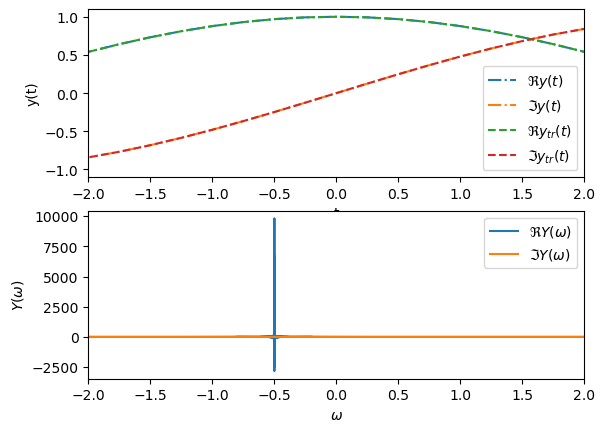

In [3]:
omega0 = 0.5
#y = np.sin(omega0*t)
#y = (1/np.sqrt(2*np.pi))*np.exp(-(t**2)/2)
y = np.exp(1j*omega0*t)
Y = 1/np.sqrt(2*np.pi)*time2freq(y,M,dt)
ytr = 1/np.sqrt(2*np.pi)*freq2time(Y,M,dt)

fig, (ax1,ax2) = plt.subplots(2)

ax1.plot(t,np.real(y),'-.',label = r'$\Re{y(t)}$')
ax1.plot(t,np.imag(y),'-.', label = r'$\Im{y(t)}$')
ax1.plot(t,np.real(ytr),'--',label = r'$\Re{y_{tr}(t)}$')
ax1.plot(t,np.imag(ytr),'--', label = r'$\Im{y_{tr}(t)}$')
ax1.set_xlabel('t')
ax1.set_ylabel('y(t)')
ax1.set_xlim(-2,2)
ax1.legend()

ax2.plot(omega,np.real(Y),label = r'$\Re{Y(\omega)}$')
ax2.plot(omega,np.imag(Y), label = r'$\Im{Y(\omega)}$')
ax2.set_xlabel(r'$\omega $')
ax2.set_ylabel(r'$Y(\omega)$')
ax2.set_xlim(-2,2)
ax2.legend()

### Testing free fermion green

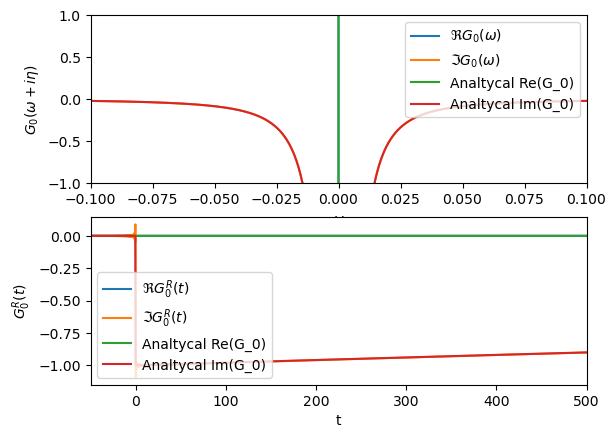

In [4]:
fig,ax = plt.subplots(2)

r = 0
mu = r

eta = dw*1.1
GR_free_omega = 1./(omega+ 1j*eta - r)
GR_free_t = (0.5/np.pi)*freq2time(GR_free_omega,M,dt)



ax[0].plot(omega,np.real(GR_free_omega), label = r'$\Re{G_0(\omega)}$')
ax[0].plot(omega,np.imag(GR_free_omega), label = r'$\Im{G_0(\omega)}$')
ax[0].plot(omega,np.real(GfreeRealomega(omega,r,eta=eta)), label = 'Analtycal Re(G_0)')
ax[0].plot(omega,np.imag(GfreeRealomega(omega,r,eta=eta)), label = 'Analtycal Im(G_0)')
ax[0].set_xlabel(r'$\omega$')
ax[0].set_ylabel(r'$G_0(\omega+i\eta)$')
ax[0].set_xlim(-0.1,0.1)
ax[0].set_ylim(-1,1)
ax[0].legend(loc = 'upper right')


ax[1].plot(t,np.real(GR_free_t), label = r'$\Re G^R_0(t)$')
ax[1].plot(t,np.imag(GR_free_t), label = r'$\Im G^R_0(t)$')
ax[1].plot(t,np.real(GfreeRealt(t,r,eta=eta)), label = 'Analtycal Re(G_0)')
ax[1].plot(t,np.imag(GfreeRealt(t,r,eta=eta)), label = 'Analtycal Im(G_0)')
ax[1].set_xlabel('t')
ax[1].set_ylabel(r'$G_0^R(t)$')
ax[1].set_xlim(-50,500)
ax[1].legend(loc = 'lower left')

### Testing free boson retarderd green 

" But wait, shouldn't D_R(t) also be proportional to \theta(t)????? : suspicious "

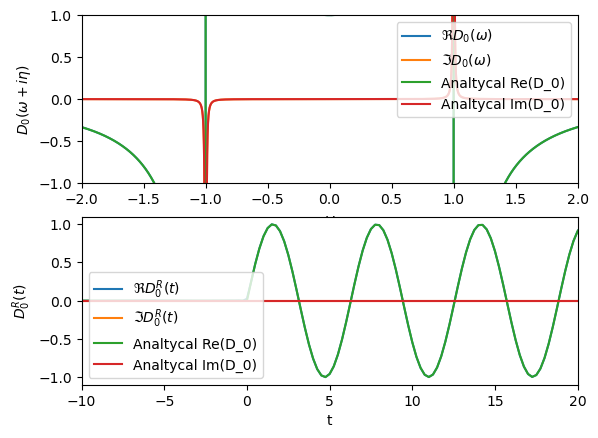

In [5]:
fig,ax = plt.subplots(2)

eta = dw*1.1
r = 1 
omega0 = np.sqrt(r)
DR_free_omega = 1./(r - (omega+1j*eta)**2)
#DR_free_omega_left = 0.5/omega0 * (1/(omega +1j*eta + omega0 ))
#DR_free_omega_right = 0.5/omega0 * (-1/(omega + 1j*eta - omega0))
#DR_free_omega = DR_free_omega_left + DR_free_omega_right
DR_free_t = (0.5/np.pi)*freq2time(DR_free_omega,M,dt)
#DR_free_t_left = (0.5/np.pi)*freq2time(DR_free_omega_left,M,dt)
#DR_free_t_right = (0.5/np.pi)*freq2time(DR_free_omega_right,M,dt)
#DR_free_t= DR_free_t_left + DR_free_t_right



ax[0].plot(omega,np.real(DR_free_omega), label = r'$\Re{D_0(\omega)}$')
ax[0].plot(omega,np.imag(DR_free_omega), label = r'$\Im{D_0(\omega)}$')
ax[0].plot(omega,np.real(DfreeRealomega(omega,r,eta=eta)), label = 'Analtycal Re(D_0)')
ax[0].plot(omega,np.imag(DfreeRealomega(omega,r,eta=eta)), label = 'Analtycal Im(D_0)')
ax[0].set_xlabel(r'$\omega$')
ax[0].set_ylabel(r'$D_0(\omega+i\eta)$')
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-1,1)
ax[0].legend(loc = 'upper right')

ax[1].plot(t,np.real(DR_free_t), label = r'$\Re D^R_0(t)$')
ax[1].plot(t,np.imag(DR_free_t), label = r'$\Im D^R_0(t)$')
ax[1].plot(t,np.real(DfreeRealt(t,r,eta=eta)), label = 'Analtycal Re(D_0)')
ax[1].plot(t,np.imag(DfreeRealt(t,r,eta=eta)), label = 'Analtycal Im(D_0)')
ax[1].set_xlabel('t')
ax[1].set_ylabel(r'$D_0^R(t)$')
ax[1].set_xlim(-10,20)
ax[1].legend(loc = 'lower left')

''' But wait, shouldn't D_R(t) also be proportional to \theta(t)????? : suspicious '''

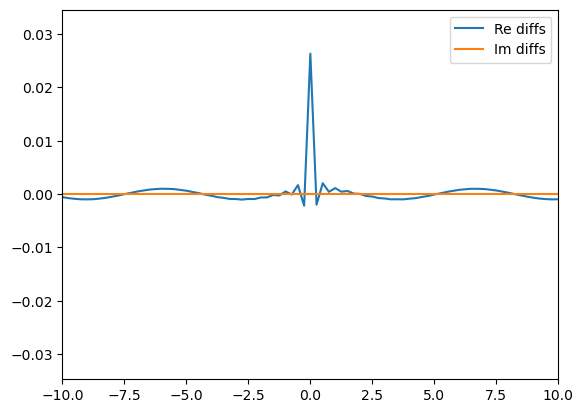

In [6]:
diffs = DR_free_t - DfreeRealt(t,r,eta=eta) #Comapring to analytical result
plt.plot(t, np.real(diffs), label='Re diffs')
plt.plot(t,np.imag(diffs), label = 'Im diffs')
plt.xlim(-10,10)
plt.legend()

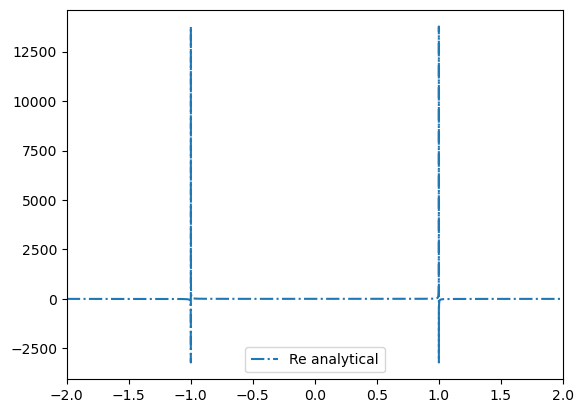

In [37]:
#plt.plot(omega,np.real(time2freq(diffs,M,dt)))
#plt.plot(omega,np.imag(time2freq(diffs,M,dt)))

#plt.plot(omega, np.real(DR_free_omega),'--')
#plt.plot(omega, np.imag(DR_free_omega),'--')
plt.plot(omega, np.real(DfreeRealomega(omega,r,eta=1e-2)),'-.', label = 'Re analytical')
#plt.plot(omega, np.imag(DfreeRealomega(omega,r,eta=0.01)),'--',label = 'Im analytical')

plt.xlim(-2,2)
plt.legend()

(-10.0, 10.0)

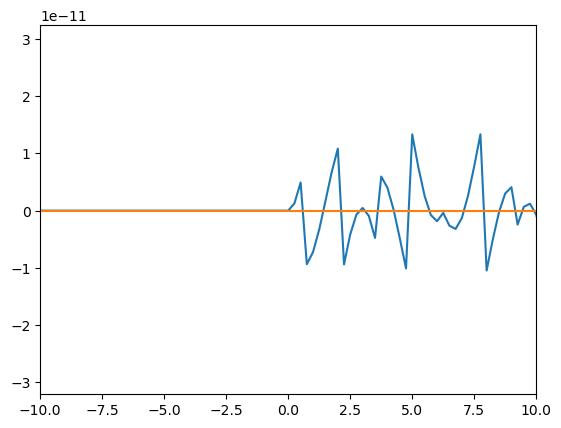

In [55]:
# plt.plot(omega, time2freq(DfreeRealt(t,r,eta=1e-6),M,dt),label='Fouriered')
# plt.plot(omega,DfreeRealomega(omega,r,eta=1e-6),label = 'Analytical')
# plt.legend()
plt.plot(t,np.imag(0.5/np.pi*freq2time(time2freq(DfreeRealt(t,r,eta=1e-8),M,dt),M,dt)), label = 'fourriered')
plt.plot(t,np.imag(DfreeRealt(t,r,eta=1e-8)))
plt.xlim(-10,10)